In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3204 - loss: 1.8174 - val_accuracy: 0.5158 - val_loss: 1.3236
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5444 - loss: 1.2720 - val_accuracy: 0.5893 - val_loss: 1.1481
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6050 - loss: 1.1097 - val_accuracy: 0.6132 - val_loss: 1.1012
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6518 - loss: 0.9941 - val_accuracy: 0.6576 - val_loss: 0.9629
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6885 - loss: 0.8996 - val_accuracy: 0.6736 - val_loss: 0.9418
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7054 - loss: 0.8508 - val_accuracy: 0.6808 - val_loss: 0.9133
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7273 - loss: 0.7895 - val_accuracy: 0.6738 - val_loss: 0.9489
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7390 - loss: 0.7466 - val_accuracy:

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6998 - loss: 0.8977
Test accuracy: 0.6935999989509583


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


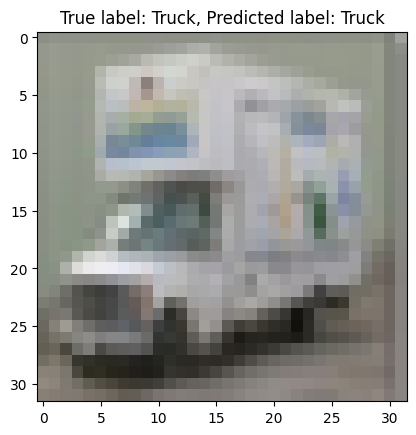

In [8]:
import matplotlib.pyplot as plt
import numpy as np

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


predictions = model.predict(test_images)

random_index = np.random.randint(0, len(test_images))

image = test_images[random_index]
true_label = np.argmax(test_labels[random_index])
predicted_label = np.argmax(predictions[random_index])

plt.imshow(image)
plt.title(f"True label: {class_names[true_label]}, Predicted label: {class_names[predicted_label]}")
plt.show()